In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

**Principle Component Analysis**
*   Visualization using 2D (When number of component = 2)
*   Visualization using 3D (When number of component = 3)


**Advance concept**

1. Mehtod to determine number of principle component
  *   Threshold value
  *   Scree plot
  *   Cross validatoin

2. PCA Feature Selection

3. Kernal PCA

4. Sprase PCA


**Different model derived from PCA**
*   Partial Least Squares Regression (PLSR)
*   Kernel Principal Component Analysis (KPCA)
* Model comparision









In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [ ]:
# normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(X_scaled.shape)  # Check the shape of feature data
print(len(y))

(569, 30)
569


In [ ]:
print("(X) Shape = ", X.shape)
print("np.mean(X) = ", np.mean(X))
print("np.std(X) = ", np.std(X))

(X) Shape =  (569, 30)
np.mean(X) =  61.890712339519624
np.std(X) =  228.29740508276657


**When PCA = 2**

2D Scatter plot can be used to presented 2 principle component

In [ ]:
pca2 = PCA(n_components=2)
pca2_result = pca2.fit_transform(X_scaled)

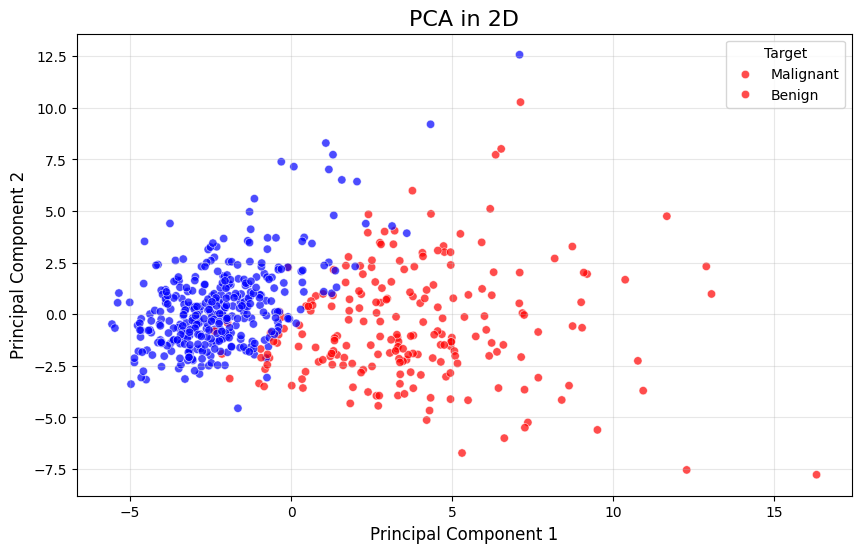

In [ ]:
# Visualize when pca=2 (2D)

plt.figure(figsize = (10, 6))
sns.scatterplot(
    x = pca2_result[:, 0],
    y = pca2_result[:, 1],
    hue = y,
    palette = {0: 'red', 1: 'blue'},
    alpha = 0.7
)

plt.title('PCA in 2D', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title = 'Target', labels = ['Malignant', 'Benign'])
plt.grid(alpha = 0.3)
plt.show()

**When PC = 3**

3D Scatter plot can be used to presented 3 principle component, which also providing a variety of viewpoints and gaining understanding of the connections between the data elements.

In [ ]:
pca3 = PCA(n_components=3)
pca3_result = pca3.fit_transform(X_scaled)

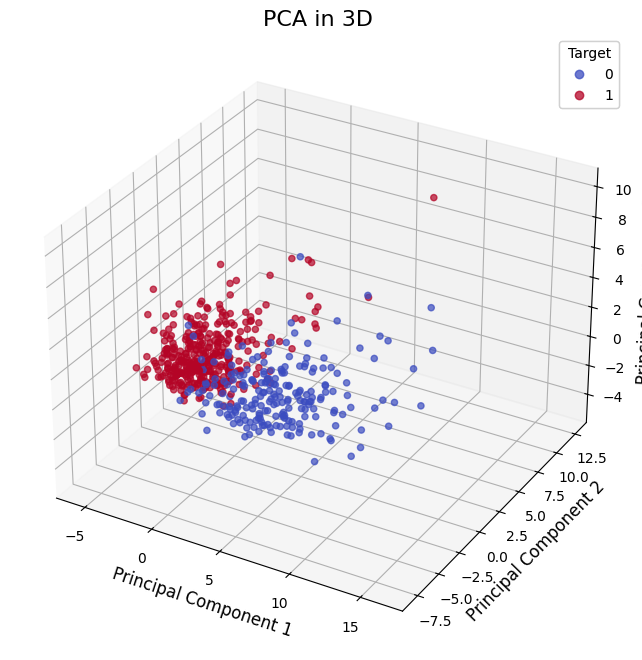

In [ ]:
# Visualize when pca=3 (3D)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca3_result[:, 0],
    pca3_result[:, 1],
    pca3_result[:, 2],
    c = y,
    cmap = 'coolwarm',
    alpha = 0.7
)

ax.set_title('PCA in 3D', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
legend = ax.legend(*scatter.legend_elements(), title = "Target")
ax.add_artist(legend)
plt.show()

**Method to determine the number of PC**

**Method 1:** Using explained variance and threshold

Calculating the explained variance value for each principle component. When the explained variance starts to plateau which is the "Elbow" point, ideally meaning that the it is consider as a optimal number of component



In [ ]:
pca_variance = PCA()
X_pca_variance = pca_variance.fit_transform(X_scaled)
explained_variance_ratio = pca_variance.explained_variance_ratio_
print("Explained variance ratio : ", explained_variance_ratio)

Explained variance ratio :  [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [ ]:
threshold = 0.95

cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_variance = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of components to explain {threshold * 100}% variance : {n_components_variance}")

Optimal number of components to explain 95.0% variance : 10


**Conclusion**

We predefined the threshold value as 0.95 (95%), meaning that the optimal number of principal components is determined when the cumulative explained variance reaches or exceeds this threshold.

**Method 2:** Using explained variance and scree plot

We have calcualte the explained variance for the component in before steps. The second method to dete
mine the optimal number of principle component can use a scree plot, as known as a visualization method

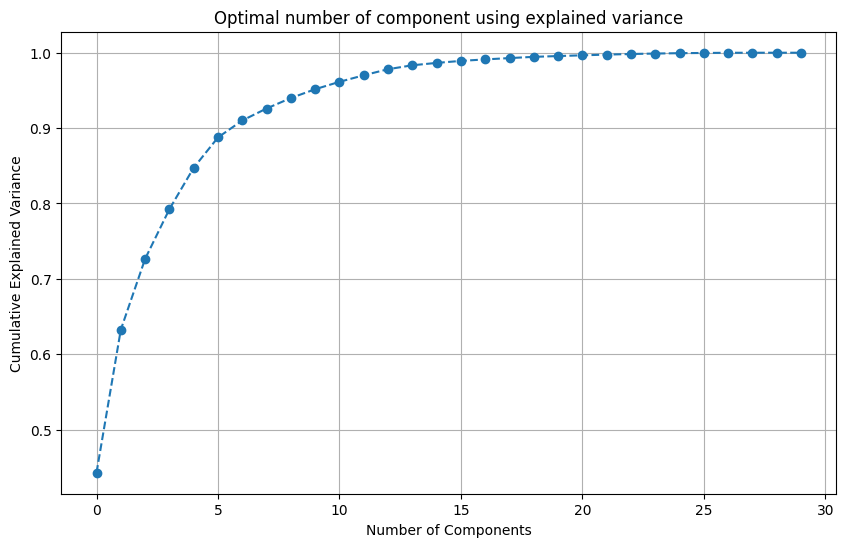

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Optimal number of component using explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

**Conclusion**

From the graph, we can conclude that the optimal number of principle components can be around 5-10. This is because the graph tend to have the 'elbow' at around 5th - 10th component.



**Method 3:** Using cross-validation

Cross-validation is the process of regularly testing a model on various subsets of the available data to determine how well it generalises to new data.

In [ ]:
n_num = range(1, X_scaled.shape[1] + 1)

model = SVC()

model_scores = []

for n in n_num:
    pca_model = PCA(n_components = n)
    X_pca = pca_model.fit_transform(X_scaled)

    # Calculate cross-validation score
    scores = cross_val_score(model, X_pca, y, cv=5)
    model_scores.append(np.mean(scores))

In [ ]:
optimal_n = n_num[np.argmax(model_scores)]
print(f"Optimal number of components : {optimal_n}")

Optimal number of components : 10


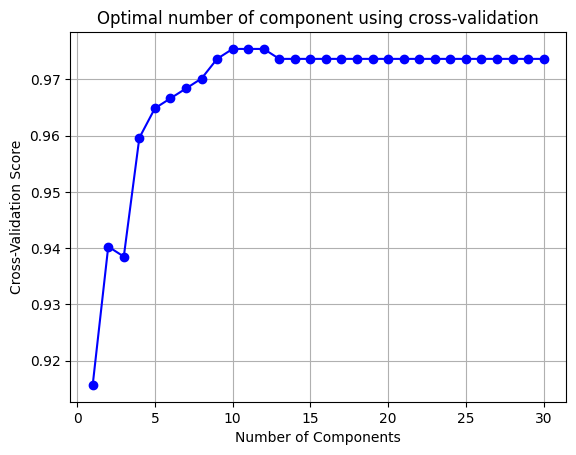

In [ ]:
plt.plot(n_num, model_scores, marker='o', linestyle='-', color='b')
plt.title('Optimal number of component using cross-validation')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()

**Conclusion**

From the graph and the result, we can see that there is a highest cross-validation score when the number of component is 10. This indicates that, in accordance with the SVC model, employing 10 principle components helps to extract the most significant information from the data while preventing overfitting.

**PCA Feature Selection**

Feature selection is a method to Select the most/top important features among all the features, in order to reduce the dimentionally of the data. At the same time also improve the model performance due to the overfitting avoided

In [ ]:
n = X_scaled.shape[1]
pca_featureSelection = PCA(n_components = n)
pca_featureSelection.fit(X_scaled)

loadings = pd.DataFrame(pca_featureSelection.components_.T, columns=[f'PC{i+1}' for i in range(n)], index = feature_names)
print("\nPCA Loadings (Feature Importance) : ", loadings)


PCA Loadings (Feature Importance) :                                PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
mean texture             0.103725 -0.059706  0.064550  0.603050  0.049469   
mean perimeter           0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
mean area                0.220995 -0.231077  0.028700 -0.053434 -0.010331   
mean smoothness          0.142590  0.186113 -0.104292 -0.159383  0.365089   
mean compactness         0.239285  0.151892 -0.074092 -0.031795 -0.011704   
mean concavity           0.258400  0.060165  0.002734 -0.019123 -0.086375   
mean concave points      0.260854 -0.034768 -0.025564 -0.065336  0.043861   
mean symmetry            0.138167  0.190349 -0.040240 -0.067125  0.305941   
mean fractal dimension   0.064363  0.366575 -0.022574 -0.048587  0.044424   
radius error             0.205979 -0.105552  0.268481 -0.097941  0.154456   
texture error            0.017428  0.0

In [ ]:
n_topComponents = 10
features_selected = loadings.iloc[:, :n_topComponents].abs().sum(axis=1).sort_values(ascending=False)

print(features_selected)

smoothness error           2.267692
mean symmetry              2.251812
symmetry error             2.223257
texture error              2.164251
worst smoothness           1.826701
mean smoothness            1.749201
fractal dimension error    1.709789
concavity error            1.707677
concave points error       1.675962
worst symmetry             1.656753
area error                 1.603384
radius error               1.492576
worst fractal dimension    1.461417
perimeter error            1.447421
mean texture               1.408386
worst concavity            1.397141
worst compactness          1.347907
mean fractal dimension     1.343680
compactness error          1.264275
worst texture              1.146948
mean radius                1.009364
mean perimeter             0.991988
mean concave points        0.905262
mean area                  0.903294
mean compactness           0.885991
worst concave points       0.850974
worst area                 0.832454
mean concavity             0

In [ ]:
n_featuresToSelect = 3
top_features = features_selected.head(n_featuresToSelect)
print(f"\nTop {n_featuresToSelect} Selected Features:")
print(top_features)


Top 3 Selected Features:
smoothness error    2.267692
mean symmetry       2.251812
symmetry error      2.223257
dtype: float64


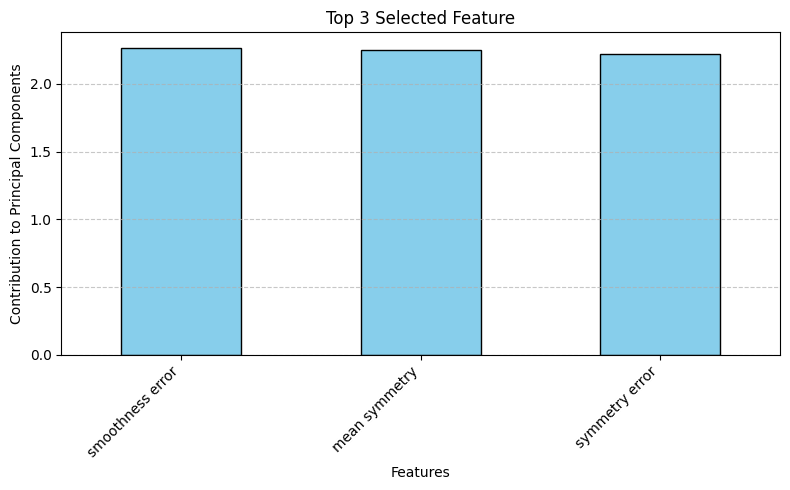

In [ ]:
plt.figure(figsize=(8, 5))
top_features.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f"Top {n_featuresToSelect} Selected Feature")
plt.ylabel("Contribution to Principal Components")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Conclusion**

From result value and the graph avove, it is showing that 'texture error', 'mean smoothness' and 'worst texture' are the most important feature due to having the highest value which are 1.0335, 0.9575 and 0.9179 accordingly

**Kernel PCA**

Kernal PCA is derived from the Principal Component Analysis (PCA) which able to discover high dimensional and non-linear relationship in data. It can also enhance the classification and clustering task.

In [ ]:
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=5)
X_kpca = kpca.fit_transform(X_scaled)

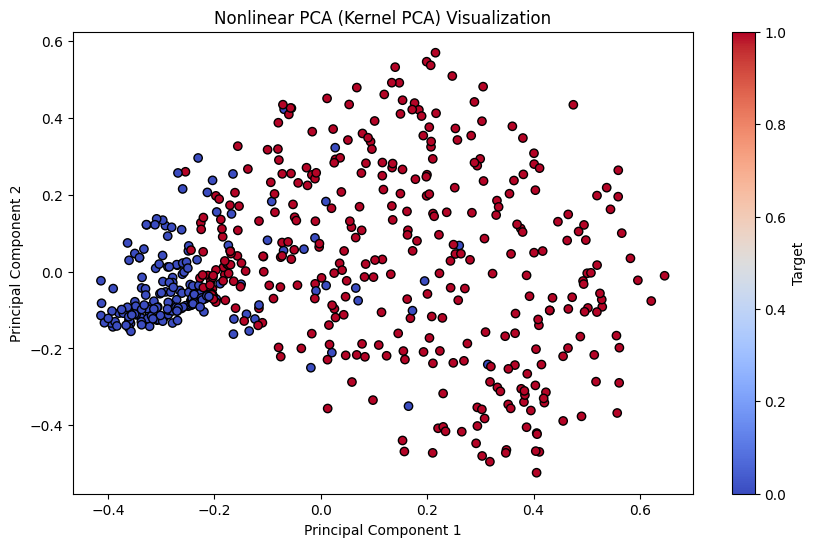

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title('Nonlinear PCA (Kernel PCA) Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()

**Conclusion**

The graph's blue spots, which stand for lower goal values, have a tendency to group together more closely in specific feature space regions, especially in the lower-left corner. On the other hand, the upper-right portion of the graph is dominated by the red points, which stand for higher target values.



**Sparse PCA**

Sparse PCA introduces sparsity constraints on the principal components.
Helps in creating more interpretable models by identifying a subset of features contributing to variance.

In [ ]:
from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA(n_components = 10, alpha=1.0, random_state=42)
X_sparse_pca = sparse_pca.fit_transform(X_scaled)

In [ ]:
explained_variance_ratio_spca = np.var(X_sparse_pca, axis=0) / np.var(X_scaled, axis=0).sum()
print(f"Explained Variance Ratio (approximate): {explained_variance_ratio_spca}")

Explained Variance Ratio (approximate): [0.2102016  0.06936672 0.07782939 0.07367204 0.06184708 0.04129302
 0.08998552 0.03743061 0.11525783 0.03645422]


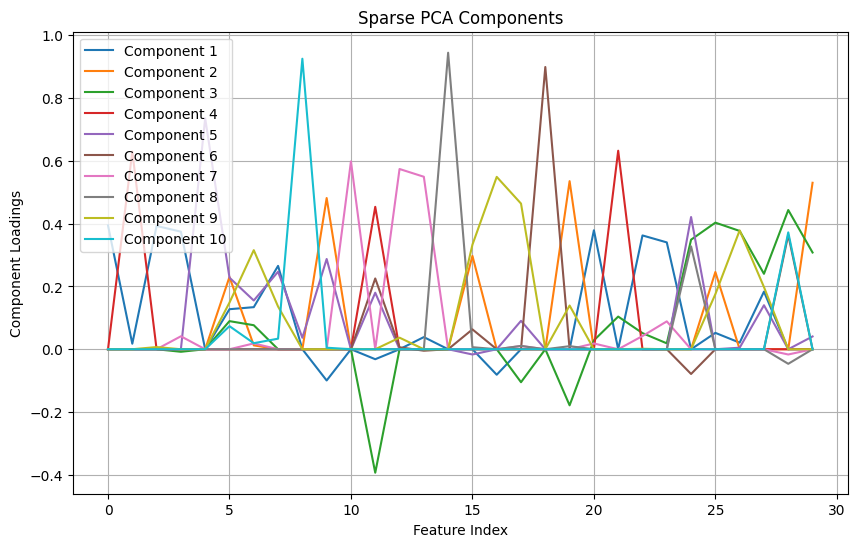

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(sparse_pca.components_[i], label=f'Component {i+1}')
plt.title('Sparse PCA Components')
plt.xlabel('Feature Index')
plt.ylabel('Component Loadings')
plt.legend()
plt.grid(True)
plt.show()

**Conclusion**

Each component exhibits a unique loading pattern, indicating that it captures several feature combinations. While certain components might be more dispersed throughout several characteristics, others might have a strong correlation with a single feature. For instance, Component 2 on feature 15 exhibits a strong correlation with the related feature, as evidenced by its high peaks on some features.


**Other Model for PCA**



**Model 1 : Partial Least Squares Regression (PLSR)**

PLSR is more appropriate for prediction tasks where the objective is to maximise the link between input and output since PLSR finds components that maximise the correlation between the predictors and the response variable.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
plsr = PLSRegression(n_components = 5)

plsr.fit(X_train, y_train)
y_pred_plsr = plsr.predict(X_test)

In [ ]:
mse_plsr = mean_squared_error(y_test, y_pred_plsr)
mae_plsr = mean_absolute_error(y_test, y_pred_plsr)
r2_plsr = r2_score(y_test, y_pred_plsr)

print("Partial Least Squares Regression (PLSR)")
print("MSE for plsr : ", mse_plsr)
print("MAE for plsr : ", mae_plsr)
print("r^2 for plsr : ", r2_plsr)

Partial Least Squares Regression (PLSR)
MSE for plsr :  0.05974455669186441
MAE for plsr :  0.20000668693857498
r^2 for plsr :  0.7456795745930331


**Model 2: Kernel Principal Component Analysis (KPCA)**

KPCA can capture non-linear correlations in the data by performing dimensionality reduction in a high-dimensional feature space using the kernel approach.

In [ ]:
kpca_model = KernelPCA(kernel='rbf', gamma=0.1, n_components = 5)
X_train_kpca = kpca_model.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train_kpca, y_train)

y_pred = regressor.predict(X_test_kpca)

In [ ]:
mse_kpca = mean_squared_error(y_test, y_pred)
mae_kpca = mean_absolute_error(y_test, y_pred)
r2_kpca = r2_score(y_test, y_pred)

print("Kernel Principal Component Analysis")
print("MSE for kpca : ", mse_kpca)
print("MAE for kpca : ",  mae_kpca)
print("R^2 for kpca : ", r2_kpca)

Kernel Principal Component Analysis
MSE for kpca :  0.08625919460781327
MAE for kpca :  0.2451609426257466
R^2 for kpca :  0.6328121542341496


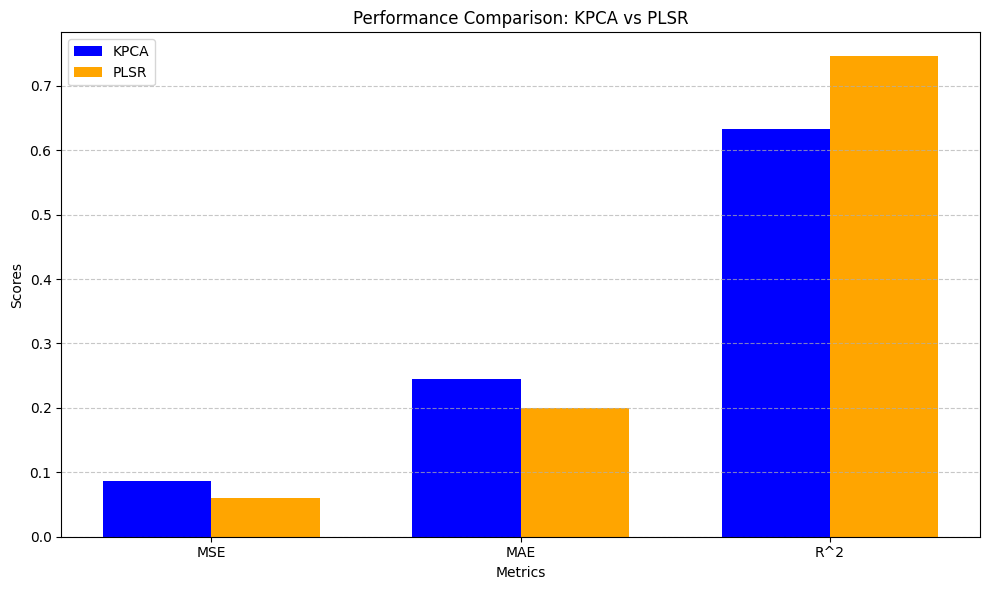

In [ ]:
metrics = ['MSE', 'MAE', 'R^2']
kpca_scores = [mse_kpca, mae_kpca, r2_kpca]
plsr_scores = [mse_plsr, mae_plsr, r2_plsr]

# Visualization
x = np.arange(len(metrics))  # x-axis positions
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, kpca_scores, width, label='KPCA', color='blue')
plt.bar(x + width / 2, plsr_scores, width, label='PLSR', color='orange')

# Customization
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Comparison: KPCA vs PLSR')
plt.xticks(x, metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

The grpah showing the comparision for for model Partial Least Squares Regression (PLSR) as well as Kernel Principal Component Analysis (KPCA) from the performance matrix such as mean squared error (MSE), mean absolute error (MAE) and r2 score. We can see that the blue colour bar (KPCA) have a higher performance matrix in MSE and MAE compared to PLSR. This means that KPCA ideally generally performs better than PLSR (such as able to generates predictions that are closer to the actual values) on this particular dataset